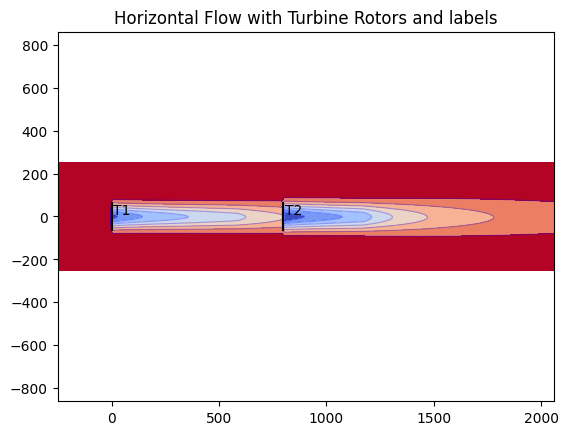

In [19]:
"""Example 2: Visualizations

This example demonstrates the use of the flow and layout visualizations in FLORIS.
First, an example wind farm layout is plotted, with the turbine names and the directions
and distances between turbines shown in different configurations by subplot.
Next, the horizontal flow field at hub height is plotted for a single wind condition.

FLORIS includes two modules for visualization:
  1) flow_visualization: for visualizing the flow field
  2) layout_visualization: for visualizing the layout of the wind farm
The two modules can be used together to visualize the flow field and the layout
of the wind farm.

"""


import matplotlib.pyplot as plt

import floris.layout_visualization as layoutviz
from floris import FlorisModel
from floris.flow_visualization import visualize_cut_plane


fmodel = FlorisModel("inputs/gch.yaml")

### Configure & Run Simulation

def two_turbine_simulation(fmodel: FlorisModel, 
                            x_turb2: int = None,
                            y_turb2: int = None,
                            print_power: bool = False):
                            
    # Set the farm layout to have 8 turbines irregularly placed
    layout_x = [0, x_turb2]
    layout_y = [0, y_turb2]
    fmodel.set(layout_x=layout_x, layout_y=layout_y)

    # set wind
    fmodel.set(wind_speeds=[8.0], 
        wind_directions=[270.0], 
        turbulence_intensities=[0.06])

    fmodel.run()

    ### Get Results
    turbine_powers = fmodel.get_turbine_powers() / 1000.0
    farm_power = fmodel.get_farm_power() / 1000.0

    if print_power:
        print("Turbine power matrix")
        print(turbine_powers)
        print("Shape: ", turbine_powers.shape)

        print("arm power")
        print(farm_power)
        print("Shape: ", farm_power.shape)

    return turbine_powers, farm_power





two_turbine_simulation(fmodel,x_turb2 = 800, y_turb2 = 0)


### Plot
horizontal_plane = fmodel.calculate_horizontal_plane(
    x_resolution=200,
    y_resolution=100,
    height=90.0,
)

turbine_names = ["T1", "T2"]

fig, ax = plt.subplots()
visualize_cut_plane(
    horizontal_plane,
    ax=ax,
    label_contours=False,
    title="Horizontal Flow with Turbine Rotors and labels",
)

# Plot the turbine rotors
layoutviz.plot_turbine_rotors(fmodel, ax=ax)
layoutviz.plot_turbine_labels(fmodel, ax=ax, turbine_names=turbine_names)

plt.show()



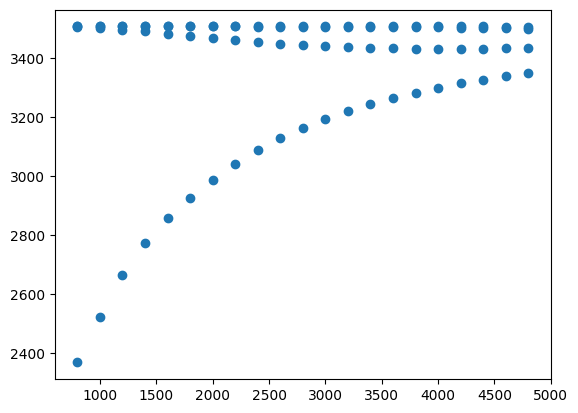

In [34]:
import pandas as pd
data= pd.DataFrame(columns = ['x_turb2', 'y_turb2', 'turbine_powers', 'farm_power'])

for x_turb2 in range(800, 5000, 200):
    for y_turb2 in [0,200,400,600]:

        turbine_powers, farm_power = two_turbine_simulation(fmodel, x_turb2=x_turb2, y_turb2=y_turb2)

        new_row = pd.DataFrame({'x_turb2': [x_turb2], 
                                'y_turb2': [y_turb2], 
                                'turbine_powers': [turbine_powers], 
                                'farm_power': [farm_power[0]]})
        data = pd.concat([data, new_row], ignore_index=True)

data.head()

plt.scatter(data['x_turb2'], data['farm_power'])